**Hey, all welcome to this data science contest. Please follow the steps as mentioned below to get to the desired results and enjoy !!**

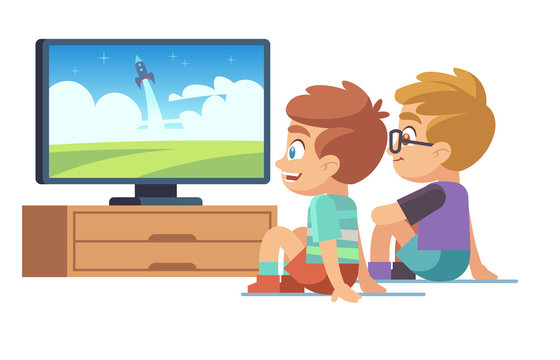

**It's summer time of 2021 and Doham and Oditz being pro kids have already got their internship offers. Now they are getting very bored and call their friend Abhus to ask him for some suggestions to pass their time. Abhus, being a very clever kid, decides to get his assignment done by them. He cleverly frames his boring assignment as an interesting task for Doham and Oditz to do.**

**He gives them a list of 14 movies to watch and tells them that he would provide them with the task after they complete watching them. After a few days Doham & Oditz ask Abhus for the task and he gives them a dataset which has entries corresponding to each of the movies that they have seen. He tells them that they shall perform certain operations and should get back to him with the answers as early as possible.**

**Doham and Oditz, though being super pro, are very lazy kids and have approached you to do this task and you need to help them out with this.**

*You can use pandas & numpy frameworks to carry out the tasks. But you can also use any other library as per your wish. You surely can look up for different functions on google. For some of the tasks we have provided some hints. If you have any doubts in the question then please rejoin the meets link as shared with you earlier or mail us at biobytes@sc.iiitd.ac.in with mail title as "doubt in data science contest"*

*PS: Do remeber to upload your dataset file on colab to start the tasks as we all know one can't do any operations without the dataset lol*

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
import pandas as pd
import numpy as np

In [172]:
df=pd.read_csv("/content/drive/MyDrive/Kaggle_BioBytes/unclean_data1.csv")

In [173]:
df.head()

,movie_title,num_critic_for_reviews,duration,DIRECTOR_facebook_likes,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
0,Avatar?ÿ,723,178.0,10,855,1000,760505847,886204.0,4834.0,NaN,3054,237000000,2009,936.0,7.9,2009.0
1,Pirates of the Caribbean: At World's End?ÿ,302,NaN,563,1000,40000,309404152,471220.0,48350.0,NaN,1238,300000000,2007,5000.0,7.1,NaN
2,Spectre?ÿ,602,148.0,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015.0
3,The Dark Knight Rises?ÿ,813,NaN,22000,23000,27000,448130642,1144337.0,106759.0,NaN,2701,250000000,2012,23000.0,8.5,NaN
4,John Carter?ÿ,462,132.0,"""475""",530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,NaN


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                14 non-null     object 
 1   num_critic_for_reviews     14 non-null     int64  
 2   duration                   11 non-null     float64
 3   DIRECTOR_facebook_likes    12 non-null     object 
 4   actor_3_facebook_likes     14 non-null     int64  
 5   ACTOR_1_facebook_likes     14 non-null     int64  
 6   gross                      14 non-null     int64  
 7   num_voted_users            13 non-null     float64
 8   Cast_Total_facebook_likes  12 non-null     float64
 9   facenumber_in_poster       9 non-null      float64
 10  num_user_for_reviews       14 non-null     int64  
 11  budget                     14 non-null     int64  
 12  title_year                 14 non-null     int64  
 13  ACTOR_2_facebook_likes     13 non-null     float64
 

**TASK 1 :-**

Rename the following 3 columns :-

1.)  ‘duration’ column to ‘time’ column 

2.)   ‘ACTOR_1_facebook_likes’ to ‘actor1_facebook_likes’

3.)   ‘ACTOR_2_facebook_likes’ to ‘actor2_facebook_likes’

4.)   ‘actor_3_facebook_likes’ to ‘actor3_facebook_likes’

Hints:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html


In [175]:
df=df.rename(columns={'duration':'time'  , 'ACTOR_1_facebook_likes':'actor1_facebook_likes' ,'ACTOR_2_facebook_likes':'actor2_facebook_likes','actor_3_facebook_likes':'actor3_facebook_likes' })

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                14 non-null     object 
 1   num_critic_for_reviews     14 non-null     int64  
 2   time                       11 non-null     float64
 3   DIRECTOR_facebook_likes    12 non-null     object 
 4   actor3_facebook_likes      14 non-null     int64  
 5   actor1_facebook_likes      14 non-null     int64  
 6   gross                      14 non-null     int64  
 7   num_voted_users            13 non-null     float64
 8   Cast_Total_facebook_likes  12 non-null     float64
 9   facenumber_in_poster       9 non-null      float64
 10  num_user_for_reviews       14 non-null     int64  
 11  budget                     14 non-null     int64  
 12  title_year                 14 non-null     int64  
 13  actor2_facebook_likes      13 non-null     float64
 

**TASK 2**

Sum up all the three columns containing likes of each actor(actor1, actor2 and actor3 respectively) and replace the actor1’s facebook likes column with this sum and rename it to ‘Total_likes’. Also, delete the other two actor’s(actor-2 and actor-3) facebook likes columns. Along with that, you also need to delete the director’s facebook likes column.

Hints:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [177]:
sum_column = df['actor1_facebook_likes'] + df['actor3_facebook_likes']+df['actor2_facebook_likes']
sum_column

0      2791.0
1     46000.0
2     11554.0
3     73000.0
4      1802.0
5     39000.0
6      1636.0
7     66000.0
8     66000.0
9     46000.0
10        NaN
11    28903.0
12     1256.0
13    46000.0
dtype: float64

In [178]:
df=df.rename(columns={"actor1_facebook_likes":'Total_likes'})
df['Total_likes']=sum_column
df=df.drop(['actor3_facebook_likes','actor2_facebook_likes','DIRECTOR_facebook_likes'],axis=1)
df.head()

,movie_title,num_critic_for_reviews,time,Total_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,title_year.1
0,Avatar?ÿ,723,178.0,2791.0,760505847,886204.0,4834.0,NaN,3054,237000000,2009,7.9,2009.0
1,Pirates of the Caribbean: At World's End?ÿ,302,NaN,46000.0,309404152,471220.0,48350.0,NaN,1238,300000000,2007,7.1,NaN
2,Spectre?ÿ,602,148.0,11554.0,200074175,275868.0,11700.0,1.0,994,245000000,2015,6.8,2015.0
3,The Dark Knight Rises?ÿ,813,NaN,73000.0,448130642,1144337.0,106759.0,NaN,2701,250000000,2012,8.5,NaN
4,John Carter?ÿ,462,132.0,1802.0,73058679,212204.0,1873.0,1.0,738,263700000,2012,6.6,NaN


**TASK 3**

There are some NaN values in the following columns and you need to perform the following operations on them :

1.)  Replace all the NaN values in the ‘time’ column by the mean of all the other non-NaN values in that column.

2.)  Replace all the NaN values in the ‘Total_likes’ column by the mean of all the other non-NaN values in that column.

3.)  Replace all the NaN values in the ‘num_voted_users’ column by the median of all the other non-NaN values in that column.

4.)  Replace all the NaN values in the ‘facenumber_in_poster’ column by 0.

Hints:

https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [179]:
# 1.) Replace all the NaN values in the ‘time’ column by the mean of all the other non-NaN values in that column.
df['time'].isna()
mean=df['time'].mean( skipna = True)
mean
df['time']=df['time'].fillna(mean)

In [180]:
#2.) Replace all the NaN values in the ‘Total_likes’ column by the mean of all the other non-NaN values in that column.
df['Total_likes'].isna()
mean=df['Total_likes'].mean( skipna = True)
mean
df['Total_likes']=df['Total_likes'].fillna(mean)


In [181]:
# 3.) Replace all the NaN values in the ‘num_voted_users’ column by the median of all the other non-NaN values in that column.
df['num_voted_users'].isna()
median=df['num_voted_users'].median( skipna = True)
median
df['num_voted_users']=df['num_voted_users'].fillna(median)


In [182]:
# 4.) Replace all the NaN values in the ‘facenumber_in_poster’ column by 0.
df['facenumber_in_poster'].isna()
df['facenumber_in_poster']=df['facenumber_in_poster'].fillna(0)
df.head()

,movie_title,num_critic_for_reviews,time,Total_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,title_year.1
0,Avatar?ÿ,723,178.000000,2791.0,760505847,886204.0,4834.0,0.0,3054,237000000,2009,7.9,2009.0
1,Pirates of the Caribbean: At World's End?ÿ,302,150.727273,46000.0,309404152,471220.0,48350.0,0.0,1238,300000000,2007,7.1,NaN
2,Spectre?ÿ,602,148.000000,11554.0,200074175,275868.0,11700.0,1.0,994,245000000,2015,6.8,2015.0
3,The Dark Knight Rises?ÿ,813,150.727273,73000.0,448130642,1144337.0,106759.0,0.0,2701,250000000,2012,8.5,NaN
4,John Carter?ÿ,462,132.000000,1802.0,73058679,212204.0,1873.0,1.0,738,263700000,2012,6.6,NaN


In [183]:
df2=df
df2
df2.shape

(14, 13)

**TASK 4**

Delete all the rows in the dataset which have ‘Total_likes’ less than or equal to 3000. 


In [168]:
i=df2[(df2['Total_likes']<=3000)].index
i

Int64Index([0, 4, 6, 12], dtype='int64')

In [184]:
df2.drop(i,inplace=True)
df2.shape



(10, 13)

In [185]:
df2

,movie_title,num_critic_for_reviews,time,Total_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,title_year.1
1,Pirates of the Caribbean: At World's End?ÿ,302,150.727273,46000.000000,309404152,471220.0,48350.0,0.0,1238,300000000,2007,7.1,NaN
2,Spectre?ÿ,602,148.000000,11554.000000,200074175,275868.0,11700.0,1.0,994,245000000,2015,6.8,2015.0
3,The Dark Knight Rises?ÿ,813,150.727273,73000.000000,448130642,1144337.0,106759.0,0.0,2701,250000000,2012,8.5,NaN
5,Spider-Man 3?ÿ,392,156.000000,39000.000000,336530303,383056.0,46055.0,0.0,1902,258000000,2007,6.2,2007.0
7,Avengers: Age of Ultron?ÿ,635,141.000000,66000.000000,458991599,462669.0,92000.0,4.0,1117,250000000,2015,7.5,NaN
8,Avengers: Age of Ultron?ÿ,635,141.000000,66000.000000,458991599,462669.0,92000.0,4.0,1117,250000000,2015,7.5,2015.0
9,Harry Potter and the Half-Blood Prince?ÿ,375,153.000000,46000.000000,301956980,321795.0,58753.0,3.0,973,250000000,2009,7.5,NaN
10,Batman v Superman: Dawn of Justice?ÿ,673,183.000000,33072.461538,330249062,383056.0,24450.0,0.0,3018,250000000,2016,6.9,2016.0
11,Superman Returns?ÿ,434,169.000000,28903.000000,200069408,240396.0,NaN,2.0,2367,209000000,2006,6.1,NaN
13,Pirates of the Caribbean: Dead Man's Chest?ÿ,313,151.000000,46000.000000,423032628,522040.0,48486.0,2.0,1832,225000000,2006,7.3,2008.0




 **TASK 5**

You need to replace the entries in the ‘budget’ column for the movies which have a budget greater than or equal to 250000000 with 1. Otherwise , replace it with 0.



In [186]:
# Report_Card["Retake"] = 

# Report_Card["Grades"].apply(lambda val: "Yes" if val < 45 else "No")
df2['budget']=df2['budget'].apply(lambda val:1 if val>=250000000 else 0)
df2['budget']

1     1
2     0
3     1
5     1
7     1
8     1
9     1
10    1
11    0
13    0
Name: budget, dtype: int64

In [188]:
i=df[(df['budget']>=250000000)].index
i

Int64Index([], dtype='int64')

**Task 6**

Finally after performing all these tasks on the dataset you need to generate a CSV file which contains only the budget column’s entries of all the movies present in the final dataset along with their IDs. ID of each movie here refers to their row number in the final dataset. **For a better understanding please go through the submission format file that we have provided to you in the contest description at kaggle in the data section and also shared via mail.**

Hints:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [189]:
final=df2['budget'].to_csv('/content/drive/MyDrive/Kaggle_BioBytes/final.csv')